In [180]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
traditional = pd.read_csv('./82_team_dataset/2010-2021-T.csv')
advanced = pd.read_csv('./82_team_dataset/2010-2021-A.csv')
opponent = pd.read_csv('./82_team_dataset/2010-2021-OPP.csv')

In [186]:
everything = pd.merge(traditional, opponent, how="inner", on=["Team", "GP", "W", "L", "Year", "MIN"])
everything = everything.drop(['#_x','#_y', '+/-_y'], axis=1)
everything = pd.merge(everything, advanced, how="inner", on=["Team", "GP", "W", "L", "Year"])
everything = everything.drop(['#'], axis=1).rename(columns={'+/-_x': '+/-', 'MIN_x': "MIN AVG", 'MIN_y': 'MIN TOTAL'})
everything

,Team,GP,W,L,WIN%,MIN AVG,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Year,OPP FGM,OPP FGA,OPP FG%,OPP 3PM,OPP 3PA,OPP 3P%,OPP FTM,OPP FTA,OPP FT%,OPP OREB,OPP DREB,OPP REB,OPP AST,OPP TOV,OPP STL,OPP BLK,OPP BLKA,OPP PF,OPP PFD,OPP PTS,MIN TOTAL,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS
0,Chicago Bulls,82,62,20,0.756,48.4,98.6,37.1,80.3,46.2,6.2,17.3,36.1,18.2,24.5,74.3,11.8,32.4,44.2,22.3,14.2,7.2,5.7,5.8,20.0,20.1,7.3,2010,34.2,79.5,43.0,5.2,16.0,32.6,17.7,23.1,76.4,10.1,28.3,38.4,19.0,14.1,6.9,5.8,5.7,20.1,20.0,91.3,3966,107.2,99.5,7.8,60.1,1.57,17.3,33.2,71.7,52.8,15.4,50.1,54.1,91.20,55.5,7542.0
1,San Antonio Spurs,82,61,21,0.744,48.2,103.7,38.4,80.8,47.5,8.4,21.1,39.7,18.5,24.2,76.7,10.1,31.7,41.9,22.4,13.4,7.3,4.5,4.6,19.0,20.7,5.7,2010,38.1,83.7,45.6,5.8,15.9,36.7,15.9,20.7,76.6,10.8,30.4,41.2,20.5,13.4,6.9,4.6,4.5,20.7,19.0,98.0,3956,110.5,104.4,6.1,58.3,1.67,17.5,27.6,71.1,50.0,14.3,52.7,56.7,93.34,53.8,7691.0
2,Miami Heat,82,58,24,0.707,48.2,102.1,37.0,76.8,48.1,6.7,18.0,37.0,21.5,27.9,76.9,9.6,32.5,42.1,20.0,13.9,6.6,5.2,3.0,20.4,21.8,7.5,2010,35.0,80.7,43.4,6.7,19.3,34.5,18.0,24.1,74.4,10.5,28.6,39.2,20.1,13.2,7.0,3.0,5.2,21.8,20.4,94.6,3956,110.6,102.9,7.8,54.1,1.44,16.1,28.7,71.5,51.4,15.1,52.4,57.3,91.63,55.6,7564.0
3,Dallas Mavericks,82,57,25,0.695,48.1,100.2,37.4,78.8,47.5,7.9,21.6,36.5,17.5,22.6,77.7,9.5,31.9,41.4,23.8,14.0,6.8,4.3,3.7,19.2,20.1,4.2,2010,36.5,81.2,45.0,6.2,18.0,34.3,16.7,22.3,75.0,10.7,30.0,40.7,20.6,13.6,7.6,3.7,4.3,20.1,19.2,96.0,3941,108.4,104.1,4.4,63.7,1.71,18.7,27.8,71.3,50.4,15.1,52.5,56.5,92.24,53.8,7581.0
4,Los Angeles Lakers,82,57,25,0.695,48.4,101.5,38.1,82.4,46.3,6.4,18.1,35.2,18.8,24.1,77.9,12.1,31.9,44.0,22.0,13.1,7.3,5.1,4.5,19.0,20.7,6.1,2010,36.7,84.0,43.7,6.8,20.3,33.5,15.2,19.9,76.5,12.2,29.3,41.5,22.3,13.6,7.1,4.5,5.1,20.7,19.0,95.4,3966,109.6,103.3,6.3,57.6,1.68,17.0,32.5,69.2,51.3,14.1,50.2,54.5,91.78,54.1,7594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Cleveland Cavaliers,72,22,50,0.306,48.4,103.8,38.6,85.8,45.0,10.0,29.7,33.6,16.7,22.4,74.3,10.4,32.3,42.8,23.8,15.5,7.8,4.5,5.9,18.2,20.2,-8.4,2020,42.0,86.7,48.4,12.4,32.4,38.3,15.9,20.4,77.9,9.9,33.8,43.7,25.4,14.3,8.5,5.9,4.5,20.2,18.2,112.3,3486,105.2,113.5,-8.3,61.8,1.54,17.5,28.0,72.9,49.9,15.7,50.8,54.3,97.96,46.0,7107.0
326,Oklahoma City Thunder,72,22,50,0.306,48.2,105.0,38.8,88.0,44.1,11.9,35.1,33.9,15.5,21.3,72.5,9.9,35.7,45.6,22.1,16.1,7.0,4.4,5.3,18.1,18.6,-10.6,2020,43.4,91.7,47.3,13.6,37.3,36.4,15.3,19.8,77.3,10.1,37.0,47.1,25.8,13.1,9.0,5.3,4.4,18.6,18.1,115.6,3471,102.8,113.4,-10.6,56.8,1.37,16.1,25.4,74.2,49.4,15.8,50.9,53.9,101.61,44.2,7353.0
327,Orlando Magic,72,21,51,0.292,48.1,104.0,38.3,89.2,42.9,10.9,31.8,34.3,16.6,21.4,77.5,10.4,35.1,45.4,21.8,12.8,6.9,4.4,5.3,17.2,18.6,-9.3,2020,42.2,89.7,47.1,13.7,36.8,37.3,15.2,19.3,78.6,9.8,37.6,47.4,26.0,12.7,7.6,5.3,4.4,18.7,17.2,113.3,3466,104.6,113.9,-9.3,57.0,1.70,16.3,25.2,74.4,48.8,12.9,49.0,52.7,99.17,45.0,7158.0
328,Detroit Pistons,72,20,52,0.278,48.4,106.6,38.7,85.6,45.2,11.6,32.9,35.1,17.8,23.4,75.9,9.6,33.1,42.7,24.2,14.9,7.4,5.2,5.8,20.5,20.4,-4.5,2020,41.4,86.9,47.6,11.3,31.4,36.2,17.0,22.3,76.0,10.0,34.4,44.3,24.8,13.9,8.0,5.8,5.2,20.4,20.5,111.1,3486,107.6,112.2,-4.5,62.6,1.62,17.8,26.7,72.5,49.3,15.1,51.9,55.6,98.19,47.3,7132.0


In [189]:
dataset = everything.drop(['Team', 'GP', 'W', 'L', 'Year'], axis=1)
winPercentage = dataset.iloc[:,0:1].values
playoffStatus = map(lambda x: x > 0.5, winPercentage)
playoffStatus = np.fromiter(playoffStatus, dtype=bool)
dataset['Playoffs'] = playoffStatus
dataset

,WIN%,MIN AVG,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,OPP FGM,OPP FGA,OPP FG%,OPP 3PM,OPP 3PA,OPP 3P%,OPP FTM,OPP FTA,OPP FT%,OPP OREB,OPP DREB,OPP REB,OPP AST,OPP TOV,OPP STL,OPP BLK,OPP BLKA,OPP PF,OPP PFD,OPP PTS,MIN TOTAL,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS,Playoffs
0,0.756,48.4,98.6,37.1,80.3,46.2,6.2,17.3,36.1,18.2,24.5,74.3,11.8,32.4,44.2,22.3,14.2,7.2,5.7,5.8,20.0,20.1,7.3,34.2,79.5,43.0,5.2,16.0,32.6,17.7,23.1,76.4,10.1,28.3,38.4,19.0,14.1,6.9,5.8,5.7,20.1,20.0,91.3,3966,107.2,99.5,7.8,60.1,1.57,17.3,33.2,71.7,52.8,15.4,50.1,54.1,91.20,55.5,7542.0,True
1,0.744,48.2,103.7,38.4,80.8,47.5,8.4,21.1,39.7,18.5,24.2,76.7,10.1,31.7,41.9,22.4,13.4,7.3,4.5,4.6,19.0,20.7,5.7,38.1,83.7,45.6,5.8,15.9,36.7,15.9,20.7,76.6,10.8,30.4,41.2,20.5,13.4,6.9,4.6,4.5,20.7,19.0,98.0,3956,110.5,104.4,6.1,58.3,1.67,17.5,27.6,71.1,50.0,14.3,52.7,56.7,93.34,53.8,7691.0,True
2,0.707,48.2,102.1,37.0,76.8,48.1,6.7,18.0,37.0,21.5,27.9,76.9,9.6,32.5,42.1,20.0,13.9,6.6,5.2,3.0,20.4,21.8,7.5,35.0,80.7,43.4,6.7,19.3,34.5,18.0,24.1,74.4,10.5,28.6,39.2,20.1,13.2,7.0,3.0,5.2,21.8,20.4,94.6,3956,110.6,102.9,7.8,54.1,1.44,16.1,28.7,71.5,51.4,15.1,52.4,57.3,91.63,55.6,7564.0,True
3,0.695,48.1,100.2,37.4,78.8,47.5,7.9,21.6,36.5,17.5,22.6,77.7,9.5,31.9,41.4,23.8,14.0,6.8,4.3,3.7,19.2,20.1,4.2,36.5,81.2,45.0,6.2,18.0,34.3,16.7,22.3,75.0,10.7,30.0,40.7,20.6,13.6,7.6,3.7,4.3,20.1,19.2,96.0,3941,108.4,104.1,4.4,63.7,1.71,18.7,27.8,71.3,50.4,15.1,52.5,56.5,92.24,53.8,7581.0,True
4,0.695,48.4,101.5,38.1,82.4,46.3,6.4,18.1,35.2,18.8,24.1,77.9,12.1,31.9,44.0,22.0,13.1,7.3,5.1,4.5,19.0,20.7,6.1,36.7,84.0,43.7,6.8,20.3,33.5,15.2,19.9,76.5,12.2,29.3,41.5,22.3,13.6,7.1,4.5,5.1,20.7,19.0,95.4,3966,109.6,103.3,6.3,57.6,1.68,17.0,32.5,69.2,51.3,14.1,50.2,54.5,91.78,54.1,7594.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.306,48.4,103.8,38.6,85.8,45.0,10.0,29.7,33.6,16.7,22.4,74.3,10.4,32.3,42.8,23.8,15.5,7.8,4.5,5.9,18.2,20.2,-8.4,42.0,86.7,48.4,12.4,32.4,38.3,15.9,20.4,77.9,9.9,33.8,43.7,25.4,14.3,8.5,5.9,4.5,20.2,18.2,112.3,3486,105.2,113.5,-8.3,61.8,1.54,17.5,28.0,72.9,49.9,15.7,50.8,54.3,97.96,46.0,7107.0,False
326,0.306,48.2,105.0,38.8,88.0,44.1,11.9,35.1,33.9,15.5,21.3,72.5,9.9,35.7,45.6,22.1,16.1,7.0,4.4,5.3,18.1,18.6,-10.6,43.4,91.7,47.3,13.6,37.3,36.4,15.3,19.8,77.3,10.1,37.0,47.1,25.8,13.1,9.0,5.3,4.4,18.6,18.1,115.6,3471,102.8,113.4,-10.6,56.8,1.37,16.1,25.4,74.2,49.4,15.8,50.9,53.9,101.61,44.2,7353.0,False
327,0.292,48.1,104.0,38.3,89.2,42.9,10.9,31.8,34.3,16.6,21.4,77.5,10.4,35.1,45.4,21.8,12.8,6.9,4.4,5.3,17.2,18.6,-9.3,42.2,89.7,47.1,13.7,36.8,37.3,15.2,19.3,78.6,9.8,37.6,47.4,26.0,12.7,7.6,5.3,4.4,18.7,17.2,113.3,3466,104.6,113.9,-9.3,57.0,1.70,16.3,25.2,74.4,48.8,12.9,49.0,52.7,99.17,45.0,7158.0,False
328,0.278,48.4,106.6,38.7,85.6,45.2,11.6,32.9,35.1,17.8,23.4,75.9,9.6,33.1,42.7,24.2,14.9,7.4,5.2,5.8,20.5,20.4,-4.5,41.4,86.9,47.6,11.3,31.4,36.2,17.0,22.3,76.0,10.0,34.4,44.3,24.8,13.9,8.0,5.8,5.2,20.4,20.5,111.1,3486,107.6,112.2,-4.5,62.6,1.62,17.8,26.7,72.5,49.3,15.1,51.9,55.6,98.19,47.3,7132.0,False


In [191]:
X = dataset.iloc[:,1:-2]  #independent columns
y = dataset.iloc[:,0:1]    #target column i.e price range

In [192]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=50)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

        Specs        Score
21        +/-  4569.684042
45     NETRTG  4532.689266
56        PIE  2680.769218
24    OPP FG%   238.978703
4         FG%   234.339385
43     OFFRTG   215.183769
54        TS%   187.367501
53       EFG%   156.688751
44     DEFRTG   142.991594
7         3P%   138.811695
27    OPP 3P%   105.141659
18       BLKA    95.299674
37    OPP BLK    95.299674
51       REB%    78.118313
34    OPP AST    63.133109
47     AST/TO    53.257791
33    OPP REB    51.923375
48  AST RATIO    51.327241
1         PTS    45.853394
12       DREB    44.442106


/Users/marcteoong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


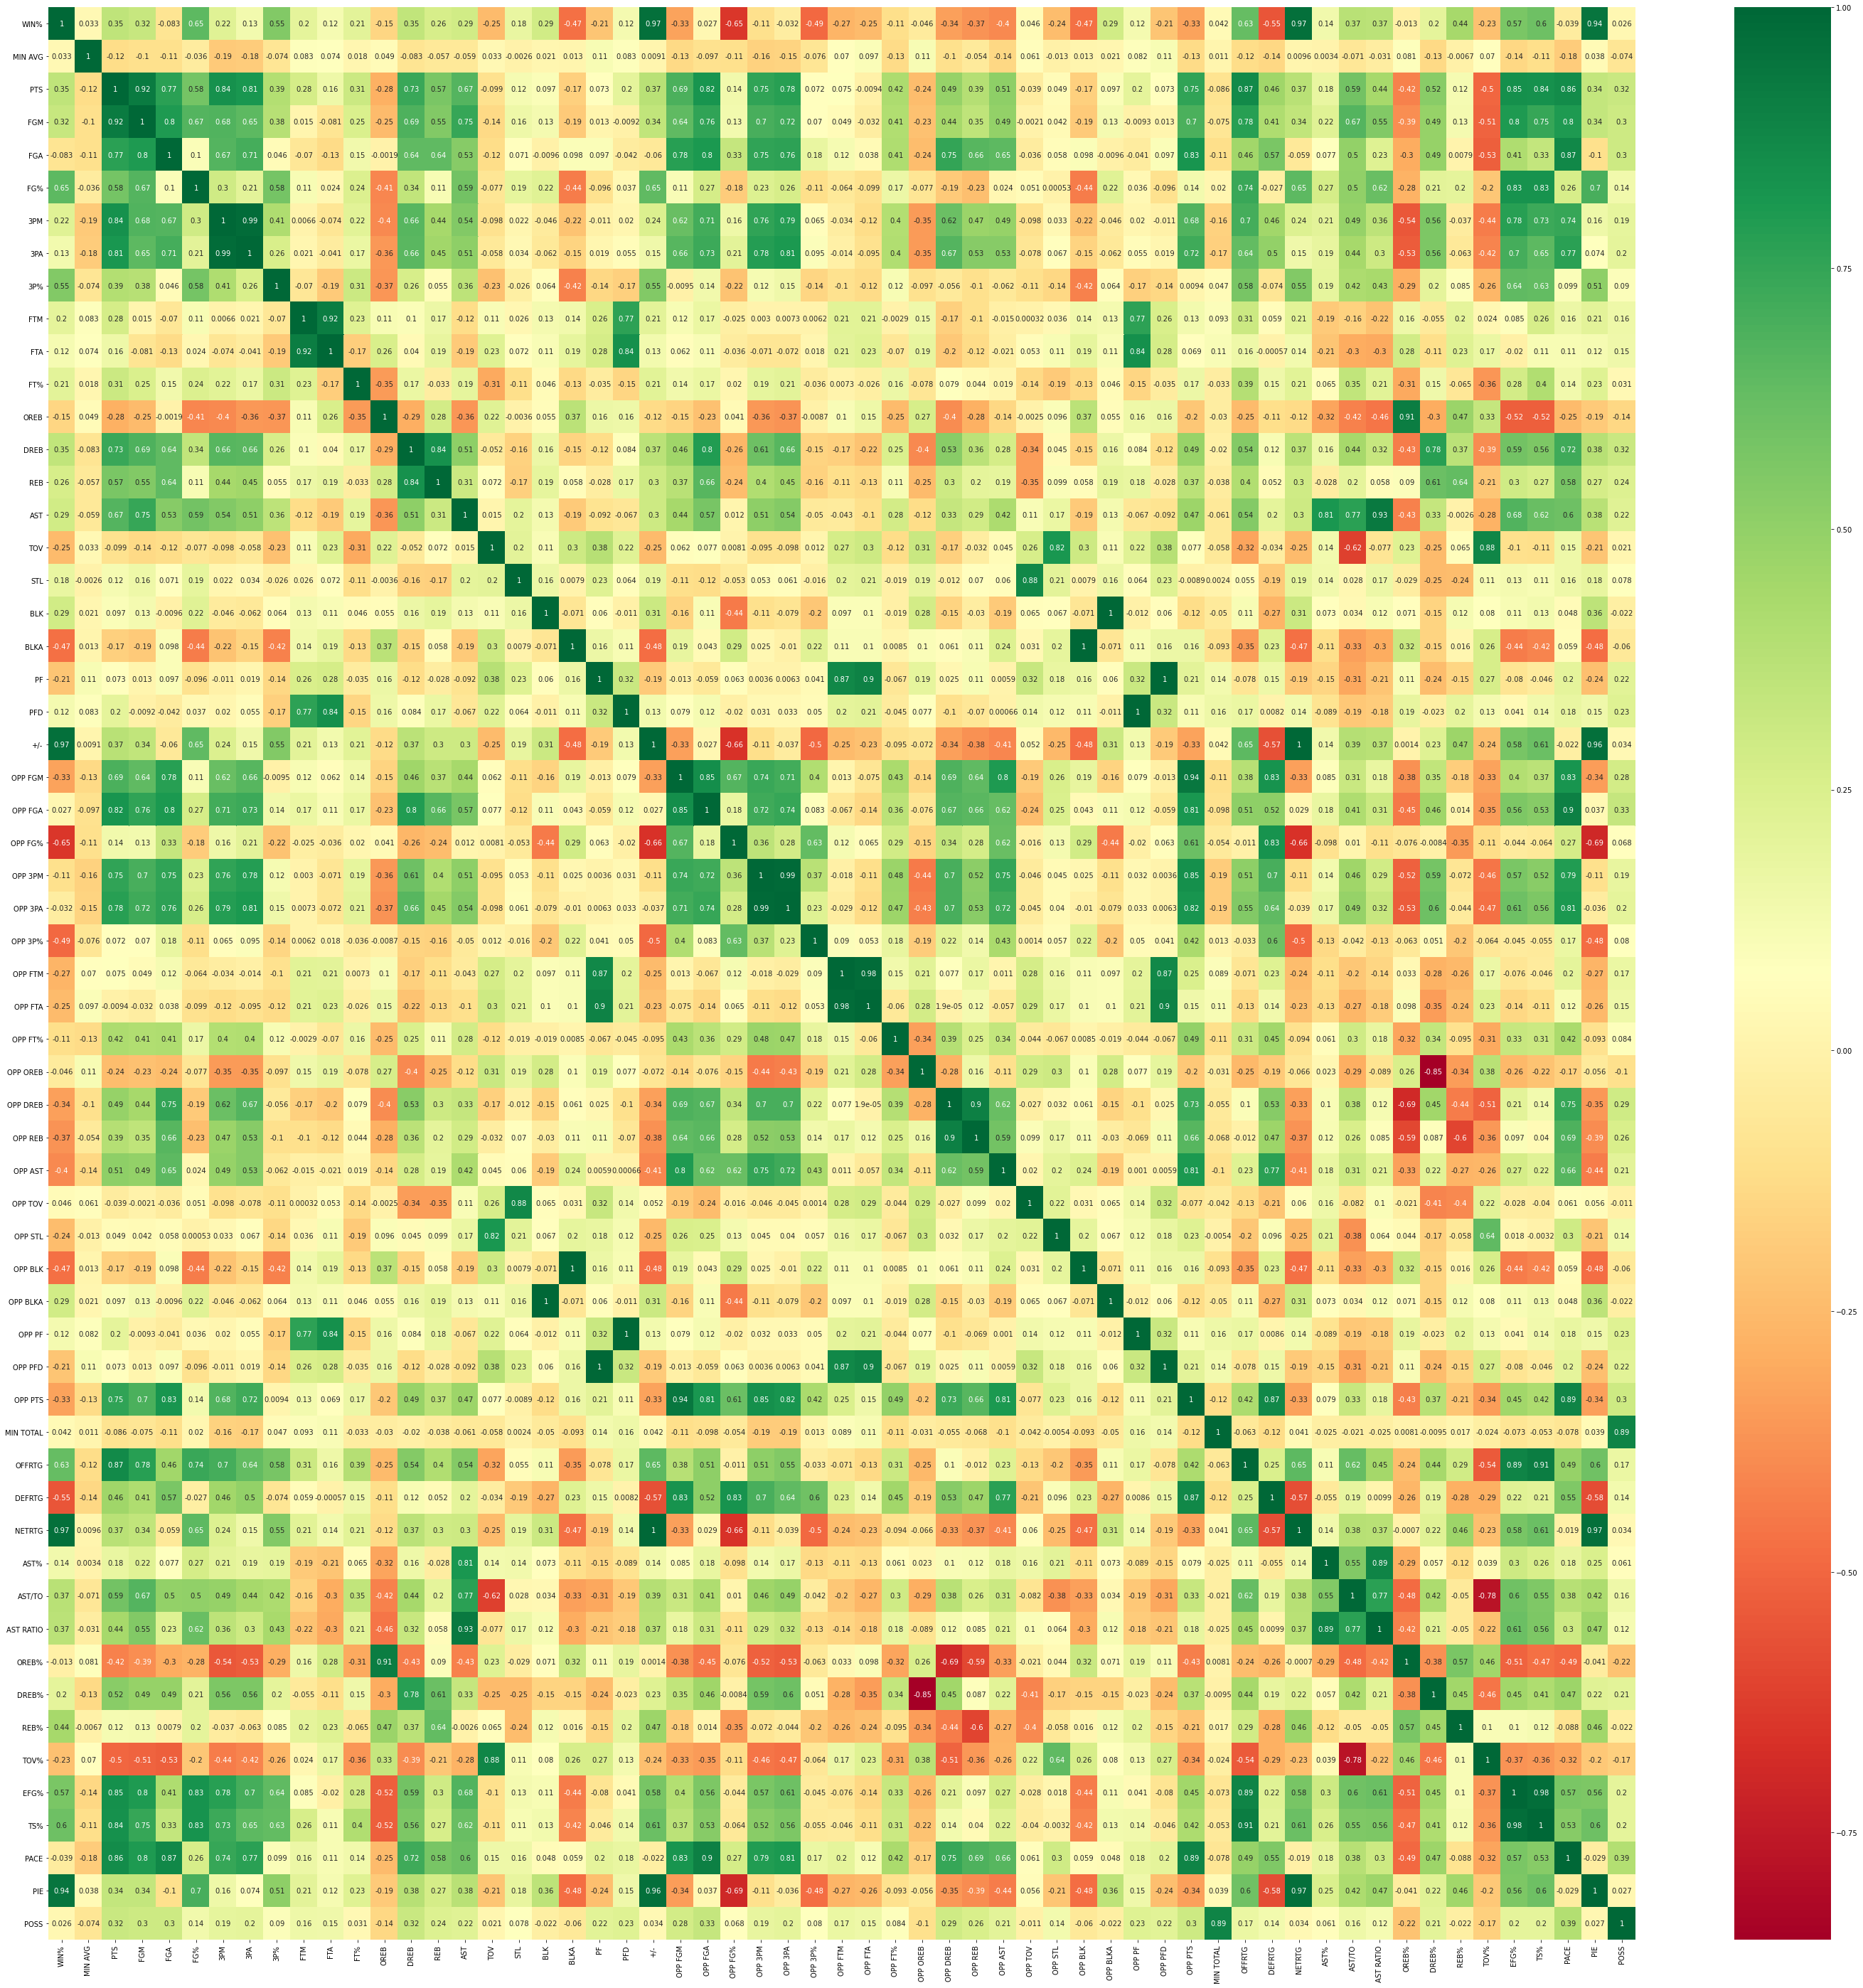

In [194]:
corrmat = dataset.drop(['Playoffs'], axis=1).corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(everything[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [195]:
print(dfcolumns)

            0
0     MIN AVG
1         PTS
2         FGM
3         FGA
4         FG%
5         3PM
6         3PA
7         3P%
8         FTM
9         FTA
10        FT%
11       OREB
12       DREB
13        REB
14        AST
15        TOV
16        STL
17        BLK
18       BLKA
19         PF
20        PFD
21        +/-
22    OPP FGM
23    OPP FGA
24    OPP FG%
25    OPP 3PM
26    OPP 3PA
27    OPP 3P%
28    OPP FTM
29    OPP FTA
30    OPP FT%
31   OPP OREB
32   OPP DREB
33    OPP REB
34    OPP AST
35    OPP TOV
36    OPP STL
37    OPP BLK
38   OPP BLKA
39     OPP PF
40    OPP PFD
41    OPP PTS
42  MIN TOTAL
43     OFFRTG
44     DEFRTG
45     NETRTG
46       AST%
47     AST/TO
48  AST RATIO
49      OREB%
50      DREB%
51       REB%
52       TOV%
53       EFG%
54        TS%
55       PACE
56        PIE
